- Conditional Independence makes it possible for us to measure an effect on the outcome solely due to the treatment and not any other variable lurking around.

## Causal Graphical Models

In [3]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import graphviz as gr
from matplotlib import style
import seaborn as sns
from matplotlib import pyplot as plt
style.use("fivethirtyeight")

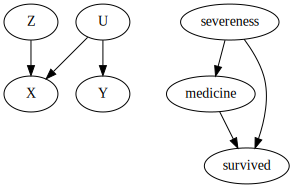

In [4]:
g = gr.Digraph()
g.edge("Z", "X")
g.edge("U", "X")
g.edge("U", "Y")

g.edge("medicine", "survived")
g.edge("severeness", "survived")
g.edge("severeness", "medicine")

g

- We use arrows or edges to show if a variable causes another 
- Z causes X. U causes X and Y
- Severeness causes both medicine and survival, and medicine also causes survival

## Crash Course in Graphical Models

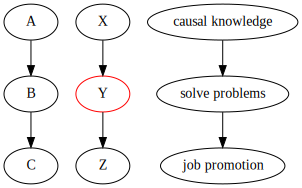

In [5]:
g = gr.Digraph()
g.edge("A", "B")
g.edge("B", "C")

g.edge("X", "Y")
g.edge("Y", "Z")
g.node("Y", "Y", color="red")


g.edge("causal knowledge", "solve problems")
g.edge("solve problems", "job promotion")

g

- Knowing about causal inference is the only way to solve business problems, and solving those problems is the only way to get a job promotion. 
- So causal knowledge implies solving issues that cause a job promotion.
    - We can say here that job promotion is dependent on causal knowledge 
- If we condition on the intermediary variable, X and Z are independent given Y.

#### Fork (Backdoor path)

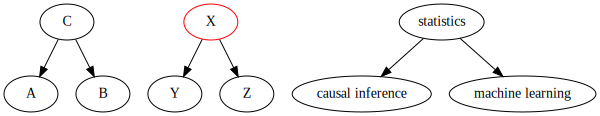

In [6]:
g = gr.Digraph()
g.edge("C", "A")
g.edge("C", "B")

g.edge("X", "Y")
g.edge("X", "Z")
g.node("X", "X", color="red")

g.edge("statistics", "causal inference")
g.edge("statistics", "machine learning")

g

- Let's say the knowledge of statistics causes you to know more about causal inference and machine learning.
    - If you are good at causal inference, you are probably good at statistics, making it more likely that you are good at machine learning.
- If we condition on the knowledge about statistics, then how much you know about machine learning becomes independent of how much you know about causal inference.

#### Collider

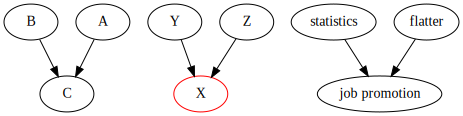

In [7]:
g = gr.Digraph()
g.edge("B", "C")
g.edge("A", "C")

g.edge("Y", "X")
g.edge("Z", "X")
g.node("X", "X", color="red")

g.edge("statistics", "job promotion")
g.edge("flatter", "job promotion")

g

- If we don't condition on the job promotion, knowing how good you are at statistics tells us nothing about how good you are at flattering. 
- On the other hand, if you did get a job promotion, knowing your level of statistics tells me about your flattering level.
    - If you are bad at statistics and did get a promotion, you will likely know how to flatter

#### Confounding Bias

- It happens when the treatment and the outcome share a common cause

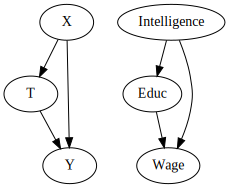

In [8]:
g = gr.Digraph()
g.edge("X", "T")
g.edge("X", "Y")
g.edge("T", "Y")

g.edge("Intelligence", "Educ"),
g.edge("Intelligence", "Wage"),
g.edge("Educ", "Wage")
g

- Assume that the treatment is education, and the outcome is income.
    - it is hard to know the casual effect of education on wages because both share a common cause: intelligence.
    - Hence, we need to close all backdoor paths between the treatment and the outcome to identify the causal effect.
    - If we control for intelligence, that is, we compare people with the same level of intellect but different levels of education, the difference in the outcome will be only due to the difference in schooling since intelligence will be the same for everyone.

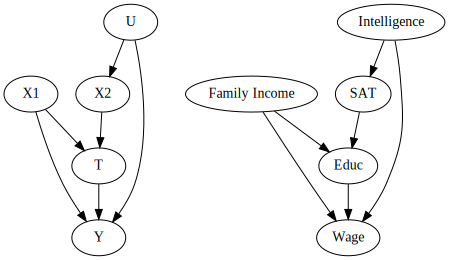

In [9]:
g = gr.Digraph()
g.edge("X1", "T")
g.edge("T", "Y")
g.edge("X2", "T")
g.edge("X1", "Y")
g.edge("U", "X2")
g.edge("U", "Y")

g.edge("Family Income", "Educ")
g.edge("Educ", "Wage")
g.edge("SAT", "Educ")
g.edge("Family Income", "Wage")
g.edge("Intelligence", "SAT")
g.edge("Intelligence", "Wage")
g


- Assume for a moment that intelligence can't affect your education directly.
    - It affects how well you do on the SATs, but the SATs determine your level of schooling since it opens the possibility of a good college. 
    - We can control for SAT and close that backdoor path

#### Selection Bias

- selection bias arises when we control for more variables than we should
- If confounding bias happens when we don’t control for a common cause, selection bias is more related to effects.

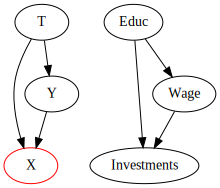

In [10]:
g = gr.Digraph()
g.edge("T", "X")
g.edge("T", "Y")
g.edge("Y", "X")
g.node("X", "X", color="red")

g.edge("Educ", "Investments")
g.edge("Educ", "Wage")
g.edge("Wage", "Investments")

g

- Imagine that you can finally randomize education to measure its effect on wages.
- Among many variables, you control for investments which is a consequence of both.
    - More educated people both earn more an invest more
    - Also, those who make more invest more.
- Since investment is a collider, you are opening a second path between the treatment and the outcome, which will make it harder to measure the direct effect
    - One way to think about this is that by controlling investments, you look at small groups of the population where investment is the same and then find the effect of education on those groups.
    - But by doing so, you are also indirectly and inadvertently not allowing wages to change much. 
    - As a result, you won't be able to see how education changes wages because you are not allowing wages to change as they should